In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

NameError: name 'height' is not defined

Load in and view the initial Image

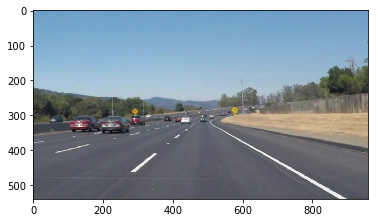

In [31]:
img = mpimg.imread('lane_finding/test_images/solidWhiteCurve.jpg')
plt.imshow(img)

Create Region of interest

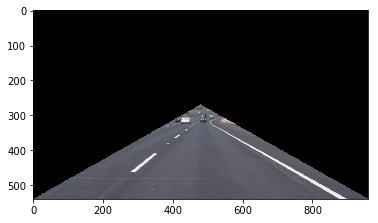

In [46]:
height, width, channels = img.shape

#Create mask shape
vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height)]

#Create blank image the same size as original image
mask = np.zeros_like(img)

match_mask_color = (255,) * channels

cv2.fillPoly(mask, np.array([vertices], np.int32), match_mask_color)

masked_image = cv2.bitwise_and(img, mask)

plt.imshow(masked_image)

In [37]:
channels

3

Gaussian Blur (To smooth the image)

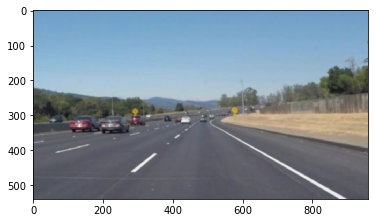

In [9]:
blur = cv2.GaussianBlur(img,(7,7),0)
plt.imshow(blur)

Greyscale the image

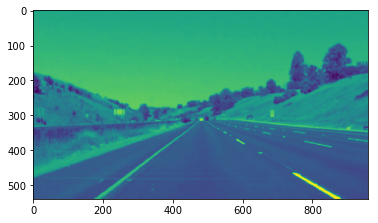

In [5]:
grey = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
plt.imshow(grey)

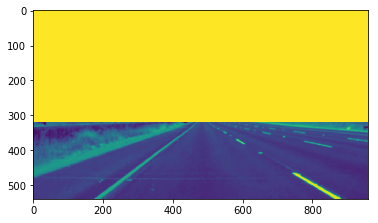

In [67]:
mask = np.array( [[[0,0],[1000,0],[1000,320],[0,320]]], dtype=np.int32 )
cv2.fillPoly(grey, mask, 255 )
plt.imshow(grey)
plt.show()

Edge detection

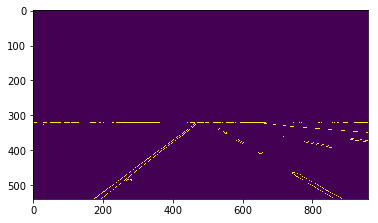

In [68]:
edge = cv2.Canny(grey,90,170)
plt.imshow(edge)

Plot Lines on original image

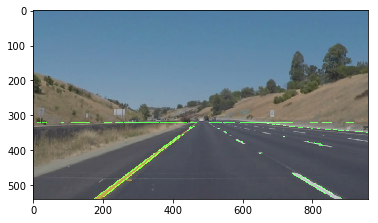

In [69]:


lines = cv2.HoughLinesP(edge, 1, np.pi/180, 50)

#     rho = 1
#     threshold = 50
#     min_line_len = 25
#     max_line_gap = 125

line_img = np.zeros(
    (
        img.shape[0],
        img.shape[1],
        3
    ),
    dtype=np.uint8,
)

for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(line_img,(x1,y1),(x2,y2),(0,255,0),2)

trial = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
plt.imshow(trial)

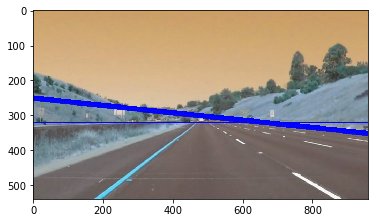

In [79]:
img = cv2.imread('lane_finding/test_images/whiteCarLaneSwitch.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,90,170,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('lane_finding/test_images/whiteCarLaneSwitch.jpg',img)

plt.imshow(img)